In [ ]:
!pip install Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 25.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model1 = YOLO("best (3).pt")
result1=model1('licen5.jpg')
result1[0].show()


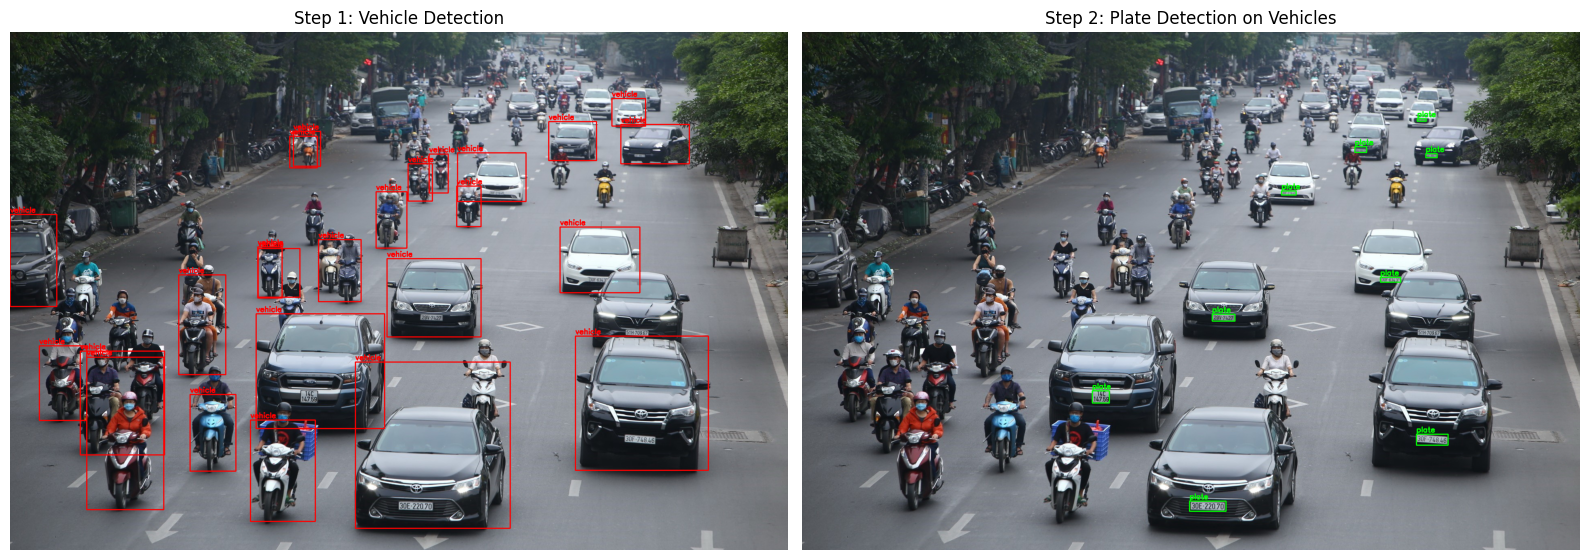

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load models ===
vehicle_model = YOLO("phuongtien2.pt")
plate_model = YOLO("best (3).pt")

# === 2. Load test image ===
img_path = "traf.jpg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h_img, w_img = image.shape[:2]

# === 3. Step 1: Detect vehicle ===
vehicle_results = vehicle_model.predict(image_rgb, conf=0.5, verbose=False)[0]
vehicle_img = image_rgb.copy()

vehicle_crops = []      # lưu thông tin vùng phương tiện [(crop, x1, y1)]
for box in vehicle_results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    # Vẽ khung phương tiện
    cv2.rectangle(vehicle_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(vehicle_img, "vehicle", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    crop = image_rgb[y1:y2, x1:x2]
    vehicle_crops.append((crop, x1, y1))  # lưu crop và vị trí góc trên trái

# === 4. Step 2: Detect plates trong từng vùng phương tiện ===
plate_img = image_rgb.copy()  # ảnh để vẽ biển số cuối cùng

for crop, offset_x, offset_y in vehicle_crops:
    plate_results = plate_model.predict(crop, conf=0.4, verbose=False)[0]

    for plate_box in plate_results.boxes:
        px1, py1, px2, py2 = map(int, plate_box.xyxy[0])

        # Chuyển toạ độ về ảnh gốc
        gx1, gy1 = offset_x + px1, offset_y + py1
        gx2, gy2 = offset_x + px2, offset_y + py2

        # Vẽ lên ảnh plate_img
        cv2.rectangle(plate_img, (int(gx1), int(gy1)), (int(gx2), int(gy2)), (0, 255, 0), 2)
        cv2.putText(plate_img, "plate", (int(gx1), int(gy1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# === 5. Hiển thị kết quả ===
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(vehicle_img)
plt.title("Step 1: Vehicle Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(plate_img)
plt.title("Step 2: Plate Detection on Vehicles")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("topkek69/vietnamese-license-plate-ocr")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vietnamese-license-plate-ocr


In [ ]:
import os


for root, dirs, files in os.walk(path):
    print(f"\n📁 {root}")
    for d in dirs:
        print(f"  📂 {d}")


📁 /kaggle/input/vietnamese-license-plate-ocr
  📂 labels
  📂 cropped
  📂 generated

📁 /kaggle/input/vietnamese-license-plate-ocr/labels

📁 /kaggle/input/vietnamese-license-plate-ocr/cropped

📁 /kaggle/input/vietnamese-license-plate-ocr/generated


In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn dataset gốc sau khi tải về
source_path = "/kaggle/input/vietnamese-license-plate-ocr"

# Các thư mục cần gộp
cropped_folder = os.path.join(source_path, 'cropped')
generated_folder = os.path.join(source_path, 'generated')
labels_folder = os.path.join(source_path, 'labels')

# Tạo thư mục ảnh đầu ra
output_img_folder = '/content/images'
os.makedirs(output_img_folder, exist_ok=True)

# Copy ảnh từ cropped
for file in os.listdir(cropped_folder):
    src = os.path.join(cropped_folder, file)
    dst = os.path.join(output_img_folder, 'crop_' + file)
    shutil.copy(src, dst)

# Copy ảnh từ generated
for file in os.listdir(generated_folder):
    src = os.path.join(generated_folder, file)
    dst = os.path.join(output_img_folder, 'gen_' + file)
    shutil.copy(src, dst)

# Đọc và gộp hai file CSV
crop_csv = pd.read_csv(os.path.join(labels_folder, 'crop_labels.csv'))
gen_csv = pd.read_csv(os.path.join(labels_folder, 'gen_labels.csv'))

# Thêm tiền tố để khớp với ảnh mới được đổi tên
crop_csv['Name'] = 'crop_' + crop_csv['Name']
gen_csv['Name'] = 'gen_' + gen_csv['Name']

# # Đổi tên cột cho thống nhất
# crop_csv = crop_csv.rename(columns={'label': 'Label', 'type': 'Type'})
# gen_csv = gen_csv.rename(columns={'label': 'Label', 'type': 'Type'})

# Giữ lại cột cần thiết
crop_csv = crop_csv[['Name', 'Label', 'Type']]
gen_csv = gen_csv[['Name', 'Label', 'Type']]

# Gộp và lưu
all_labels = pd.concat([crop_csv, gen_csv], ignore_index=True)
all_labels.to_csv('/content/labels.csv', index=False)

print("✅ Đã gộp ảnh và file CSV thành công!")


✅ Đã gộp ảnh và file CSV thành công!


In [ ]:
import pandas as pd

# Đọc file CSV mới
labels_df = pd.read_csv('/content/labels.csv')

# Hiển thị một số dòng đầu tiên để kiểm tra
print(labels_df.shape)

(12190, 3)


In [ ]:
import os
import pandas as pd
import random
# Đọc dữ liệu từ CSV
csv_path = '/content/labels.csv'  # Đường dẫn đến file CSV của bạn
labels_df = pd.read_csv(csv_path)

# Thư mục chứa ảnh
images_folder = '/content/images'
# Thư mục lưu các tệp nhãn TXT
labels_txt_folder = '/content/labels_txt'

# Tạo thư mục lưu các tệp nhãn TXT nếu chưa có
os.makedirs(labels_txt_folder, exist_ok=True)

# Tạo tệp nhãn TXT cho mỗi ảnh
for _, row in labels_df.iterrows():
    # Đường dẫn ảnh và nhãn
    img_filename = row['Name']
    label = row['Label']

    # Đảm bảo ảnh có tên đầy đủ với đường dẫn
    img_path = os.path.join(images_folder, img_filename)
    label_filename = os.path.join(labels_txt_folder, img_filename.replace('.jpg', '.txt'))

    # Lưu nhãn vào tệp
    with open(label_filename, 'w') as f:
        f.write(label)

print("✅ Đã tạo tệp nhãn TXT thành công!")

# Danh sách các ảnh và tệp nhãn tương ứng
image_files = os.listdir(images_folder)

# Danh sách huấn luyện và kiểm tra
train_list = []
val_list = []

# Chia 80% huấn luyện, 20% kiểm tra
for image_file in image_files:
    img_path = os.path.join(images_folder, image_file)
    label_path = os.path.join(labels_txt_folder, image_file.replace('.jpg', '.txt'))

    # Tạo cặp ảnh và nhãn
    data_line = f"{img_path} {label_path}"

    # Chia 80% cho huấn luyện, 20% cho kiểm tra
    if random.random() < 0.8:
        train_list.append(data_line)
    else:
        val_list.append(data_line)

# Lưu danh sách huấn luyện vào file
with open('train_list.txt', 'w') as f:
    for item in train_list:
        f.write(item + '\n')

# Lưu danh sách kiểm tra vào file
with open('val_list.txt', 'w') as f:
    for item in val_list:
        f.write(item + '\n')

print("✅ Đã tạo danh sách train_list.txt và val_list.txt thành công!")


✅ Đã tạo tệp nhãn TXT thành công!
✅ Đã tạo danh sách train_list.txt và val_list.txt thành công!


In [ ]:
def clean_filelist(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Giữ lại phần tên ảnh (trước khoảng trắng nếu có)
    cleaned_lines = [os.path.basename(line.strip().split()[0]) + '\n' for line in lines]

    with open(file_path, 'w') as f:
        f.writelines(cleaned_lines)

# Đường dẫn tới file list
clean_filelist('/content/train_list.txt')
clean_filelist('/content/val_list.txt')

print("✅ Đã làm sạch train_list.txt và val_list.txt thành công.")


✅ Đã làm sạch train_list.txt và val_list.txt thành công.


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0



0: 416x640 1 truck, 37.3ms
Speed: 2.0ms preprocess, 37.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


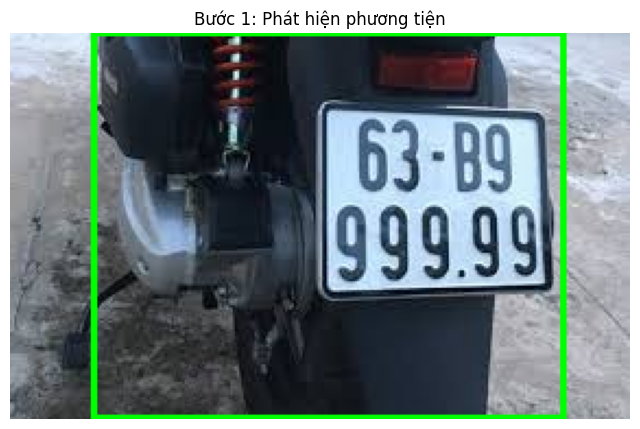


0: 544x640 1 licence, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


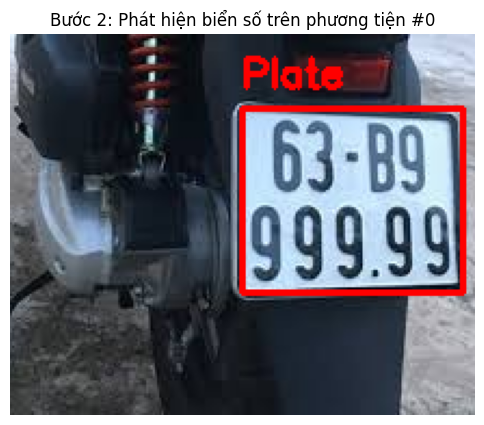

[OCR #0] Kết quả: 63*B9" (conf: 0.13)


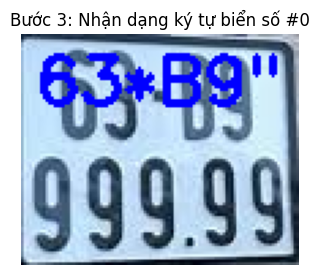

In [ ]:
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt
import os

# ===== Khởi tạo model =====
model_pt = YOLO('/content/phuongtien2.pt')  # Model detect phương tiện
model_lp = YOLO('/content/best (3).pt')      # Model detect biển số
reader = easyocr.Reader(['en'], gpu=True)  # EasyOCR

# ===== Đọc ảnh =====
image_path = '/content/licen7.jpg'  # Ảnh đầu vào
image = cv2.imread(image_path)
img_step1 = image.copy()  # ảnh gốc để vẽ bước 1

# ===== BƯỚC 1: Detect phương tiện =====
results1 = model_pt(image)[0]
boxes_pt = results1.boxes.xyxy.cpu().numpy().astype(int)

for i, (x1, y1, x2, y2) in enumerate(boxes_pt):
    cv2.rectangle(img_step1, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img_step1, f"Vehicle #{i}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Hiển thị ảnh bước 1
plt.figure(figsize=(8, 6))
plt.title("Bước 1: Phát hiện phương tiện")
plt.imshow(cv2.cvtColor(img_step1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# ===== BƯỚC 2 + 3: Detect biển số + OCR =====
plate_id = 0
for i, (x1, y1, x2, y2) in enumerate(boxes_pt):
    vehicle_crop = image[y1:y2, x1:x2]
    img_step2 = vehicle_crop.copy()

    # B2: Detect biển số
    results2 = model_lp(vehicle_crop)[0]
    boxes_lp = results2.boxes.xyxy.cpu().numpy().astype(int)

    for (px1, py1, px2, py2) in boxes_lp:
        cv2.rectangle(img_step2, (px1, py1), (px2, py2), (0, 0, 255), 2)
        cv2.putText(img_step2, f"Plate", (px1, py1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        # Hiển thị ảnh phương tiện với khung biển số
        plt.figure(figsize=(6, 5))
        plt.title(f"Bước 2: Phát hiện biển số trên phương tiện #{i}")
        plt.imshow(cv2.cvtColor(img_step2, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # B3: OCR
        plate_crop = vehicle_crop[py1:py2, px1:px2]
        result = reader.readtext(plate_crop)

        img_step3 = plate_crop.copy()
        if result:
            text = result[0][1]
            conf = result[0][2]
            print(f"[OCR #{plate_id}] Kết quả: {text} (conf: {conf:.2f})")

            # Vẽ kết quả OCR lên ảnh
            cv2.putText(img_step3, f"{text}", (5, 25),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
        else:
            print(f"[OCR #{plate_id}] Không đọc được.")
            cv2.putText(img_step3, "OCR fail", (5, 25),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # Hiển thị ảnh biển số với text
        plt.figure(figsize=(4, 3))
        plt.title(f"Bước 3: Nhận dạng ký tự biển số #{plate_id}")
        plt.imshow(cv2.cvtColor(img_step3, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        plate_id += 1


In [ ]:
def levenshtein_distance(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            dp[i][j] = min(dp[i-1][j] + 1,      # xóa
                           dp[i][j-1] + 1,      # chèn
                           dp[i-1][j-1] + cost) # thay
    return dp[m][n]

def cer(preds, targets):
    total_dist = 0
    total_len = 0
    for pred, target in zip(preds, targets):
        dist = levenshtein_distance(pred, target)
        total_dist += dist
        total_len += len(target)
    return total_dist / total_len if total_len > 0 else 0


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim

# Bộ ký tự cho biển số
charset = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"


In [ ]:
class OCRDataset(Dataset):
    def __init__(self, list_file, img_dir, label_dir, transform=None, charset=charset):
        with open(list_file, 'r') as f:
            self.image_names = [line.strip() for line in f.readlines()]
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.charset = charset
        self.char_to_idx = {char: idx + 1 for idx, char in enumerate(charset)}  # CTC: 0 là blank

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        image = Image.open(img_path).convert('L')  # grayscale
        if self.transform:
            image = self.transform(image)

        with open(label_path, 'r') as f:
            label_str = f.readline().strip().replace(" ", "").replace("Đ", "D")

        # Kiểm tra ký tự lạ
        for c in label_str:
            if c not in self.char_to_idx:
                raise ValueError(f"⚠️ Ký tự không hợp lệ '{c}' trong file {label_path}")

        label_idx = torch.tensor([self.char_to_idx[c] for c in label_str], dtype=torch.long)

        return image, label_idx, len(label_idx)


In [ ]:
class CRNN(nn.Module):
    def __init__(self, img_height, n_channels, n_classes):
        super(CRNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(n_channels, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, 1, 1), nn.ReLU(),
            nn.Conv2d(256, 256, 3, 1, 1), nn.ReLU(), nn.MaxPool2d((2, 1), (2, 1)),
            nn.Conv2d(256, 512, 3, 1, 1), nn.ReLU(), nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, 3, 1, 1), nn.ReLU(), nn.BatchNorm2d(512),
            nn.MaxPool2d((2, 1), (2, 1)),
            nn.Conv2d(512, 512, 2, 1, 0), nn.ReLU()
        )
        self.rnn = nn.Sequential(
            nn.LSTM(512, 256, bidirectional=True, batch_first=True),
            nn.Linear(512, n_classes)
        )

    def forward(self, x):
        x = self.cnn(x)
        b, c, h, w = x.size()
        x = x.squeeze(2).permute(0, 2, 1)  # (B, W, C)
        x, _ = self.rnn[0](x)
        x = self.rnn[1](x)
        return x.log_softmax(2)


In [ ]:
!pip install editdistance

In [ ]:
def collate_fn(batch):
    images, labels, lengths = zip(*batch)
    images = torch.stack(images)
    labels = torch.cat(labels)
    lengths = torch.tensor(lengths, dtype=torch.long)
    return images, labels, lengths

def compute_cer(preds, targets):
    import editdistance
    total_edits = 0
    total_chars = 0
    for pred, target in zip(preds, targets):
        total_edits += editdistance.eval(pred, target)
        total_chars += len(target)
    return total_edits / total_chars if total_chars > 0 else 0

def train_crnn(num_epochs=10, batch_size=32, lr=0.0001, checkpoint_path=None, save_path="crnn_checkpoint.pt"):
    n_classes = len(charset) + 1  # +1 cho CTC blank
    transform = transforms.Compose([
        transforms.Resize((32, 100)),
        transforms.ToTensor()
    ])

    train_dataset = OCRDataset('train_list.txt', 'images', 'labels_txt', transform, charset)
    val_dataset = OCRDataset('val_list.txt', 'images', 'labels_txt', transform, charset)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🖥️ Using device: {device}")

    model = CRNN(32, 1, n_classes).to(device)
    criterion = nn.CTCLoss(blank=0, zero_infinity=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    start_epoch = 0
    best_cer = float('inf')
    best_loss = float('inf')

    if checkpoint_path:
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        best_cer = checkpoint.get("best_cer", best_cer)
        best_loss = checkpoint.get("best_loss", best_loss)
        print(checkpoint['epoch'])
        print(best_cer,best_loss)
        lr *= 0.95 ** (checkpoint['epoch'])
        print(f"📦 Loaded checkpoint from {checkpoint_path}, continuing from epoch {start_epoch}")

    for epoch in range(start_epoch, start_epoch + num_epochs):
        lr *= 0.95
        model.train()
        total_loss = 0
        for imgs, labels, label_lengths in train_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            preds = model(imgs)
            pred_lengths = torch.full((preds.size(0),), preds.size(1), dtype=torch.long)

            loss = criterion(preds.permute(1, 0, 2), labels, pred_lengths, label_lengths)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"📘 Epoch {epoch+1}, Loss: {avg_loss:.4f}")

        # 👉 Evaluate trên tập val bằng CER
        model.eval()
        val_preds, val_targets = [], []
        with torch.no_grad():
            for imgs, labels, label_lengths in val_loader:
                imgs = imgs.to(device)
                preds = model(imgs)
                probs = preds.softmax(2)
                _, pred_idx = probs.max(2)

                for pred_seq in pred_idx:
                    pred_text, prev_char = [], -1
                    for idx in pred_seq.cpu().numpy():
                        if idx != prev_char and idx != 0:
                            pred_text.append(charset[idx - 1])
                        prev_char = idx
                    val_preds.append(''.join(pred_text))

                label_idx = 0
                for length in label_lengths:
                    label_seq = labels[label_idx:label_idx + length]
                    label_text = ''.join([charset[i - 1] for i in label_seq if i != 0])
                    val_targets.append(label_text)
                    label_idx += length

        cer = compute_cer(val_preds, val_targets)
        print(f"📊 Validation CER: {cer:.4f}")

        # ✅ Ưu tiên lưu nếu CER tốt hơn
        if cer < best_cer:
            best_cer = cer
            best_loss = avg_loss  # cập nhật luôn best_loss kèm theo
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'best_cer': best_cer,
                'best_loss': best_loss
            }, save_path)
            print(f"💾 Đã lưu model tốt nhất theo CER (CER={cer:.4f}) vào {save_path}")

        # ✅ Nếu CER không tốt hơn nhưng loss vẫn tốt hơn thì vẫn lưu
        elif avg_loss < best_loss:
            best_loss = avg_loss
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'best_cer': best_cer,
                'best_loss': best_loss
            }, save_path)
            print(f"💾 Đã lưu model theo train loss (Loss={avg_loss:.4f}) vào {save_path}")

    return model





In [ ]:
import torch

def inspect_checkpoint(path):
    checkpoint = torch.load(path, map_location='cpu')
    epoch = checkpoint.get('epoch', 'N/A')
    best_cer = checkpoint.get('best_cer', 'N/A')
    best_loss = checkpoint.get('best_loss', 'N/A')

    print(f"📂 Checkpoint: {path}")
    print(f"📌 Epoch: {epoch}")
    print(f"✅ Best CER: {best_cer}")
    print(f"🔻 Best Train Loss: {best_loss}")

# Gọi hàm:
inspect_checkpoint("crnn_checkpoint.pt")


📂 Checkpoint: crnn_checkpoint.pt
📌 Epoch: 246
✅ Best CER: 0.1527654975930838
🔻 Best Train Loss: 9.117882931268798e-05


In [ ]:
model = train_crnn(num_epochs=100,checkpoint_path="crnn_checkpoint.pt")

🖥️ Using device: cuda
146
0.15772669220945082 0.0021566400376379817
📦 Loaded checkpoint from crnn_checkpoint.pt, continuing from epoch 147
📘 Epoch 148, Loss: 0.0090
📊 Validation CER: 0.1666
📘 Epoch 149, Loss: 0.0467
📊 Validation CER: 0.1735
📘 Epoch 150, Loss: 0.0292
📊 Validation CER: 0.1687
📘 Epoch 151, Loss: 0.0158
📊 Validation CER: 0.1656
📘 Epoch 152, Loss: 0.0084
📊 Validation CER: 0.1593
📘 Epoch 153, Loss: 0.0072
📊 Validation CER: 0.1633
📘 Epoch 154, Loss: 0.0052
📊 Validation CER: 0.1620
📘 Epoch 155, Loss: 0.0072
📊 Validation CER: 0.1658
📘 Epoch 156, Loss: 0.0189
📊 Validation CER: 0.1683
📘 Epoch 157, Loss: 0.0470
📊 Validation CER: 0.1686
📘 Epoch 158, Loss: 0.0169
📊 Validation CER: 0.1617
📘 Epoch 159, Loss: 0.0075
📊 Validation CER: 0.1621
📘 Epoch 160, Loss: 0.0054
📊 Validation CER: 0.1585
📘 Epoch 161, Loss: 0.0037
📊 Validation CER: 0.1567
💾 Đã lưu model tốt nhất theo CER (CER=0.1567) vào crnn_checkpoint.pt
📘 Epoch 162, Loss: 0.0026
📊 Validation CER: 0.1569
💾 Đã lưu model theo train l

In [ ]:
def decode_predict(preds, idx_to_char):
    pred_indices = preds.argmax(2).squeeze(0).detach().cpu().numpy().tolist()

    # CTC decode: loại bỏ các số trùng nhau liên tiếp và số 0 (blank)
    decoded = []
    prev_idx = -1
    for idx in pred_indices:
        if idx != prev_idx and idx != 0:
            decoded.append(idx)
        prev_idx = idx

    chars = [idx_to_char[i] for i in decoded]
    return ''.join(chars)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def predict_image(model, image_path, charset):
    transform = transforms.Compose([
        transforms.Resize((32, 100)),
        transforms.ToTensor()
    ])

    image = Image.open(image_path).convert('L')
    input_tensor = transform(image).unsqueeze(0).to(next(model.parameters()).device)

    model.eval()
    with torch.no_grad():
        preds = model(input_tensor)

    idx_to_char = {idx + 1: char for idx, char in enumerate(charset)}  # blank là 0
    predicted_text = decode_predict(preds, idx_to_char)

    # Hiển thị ảnh và kết quả
    plt.imshow(image, cmap='gray')
    plt.title(f"📌 Dự đoán: {predicted_text}")
    plt.axis('off')
    plt.show()

    return predicted_text


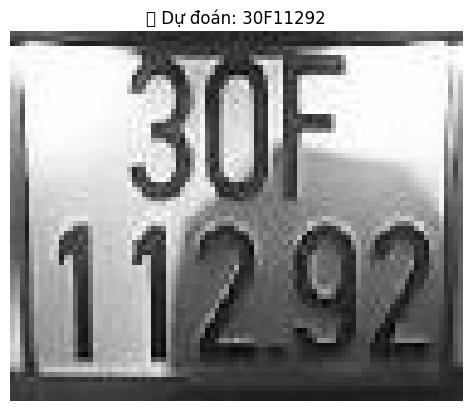

'30F11292'

In [ ]:
predict_image(model, 'images/crop_car_1.jpg', charset)


In [ ]:
torch.save(model.state_dict(), "crnn_checkpoint.pt")
print("✅ Mô hình đã được lưu.")


✅ Mô hình đã được lưu.


In [ ]:
def load_model(checkpoint_path, charset):
    n_classes = len(charset) + 1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = CRNN(32, 1, n_classes).to(device)

    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"📥 Đã load mô hình từ {checkpoint_path}")

    return model



📥 Đã load mô hình từ crnn_checkpoint.pt


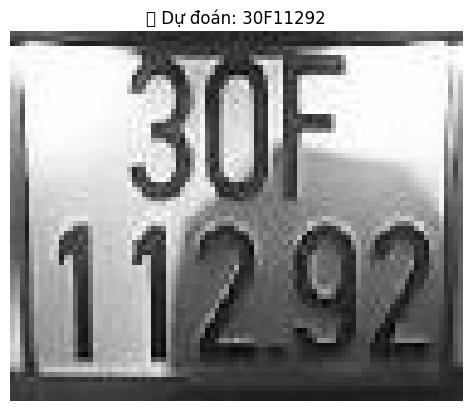

'30F11292'

In [ ]:
model = load_model("crnn_checkpoint.pt", charset).to("cuda" if torch.cuda.is_available() else "cpu")
#model = train_crnn(num_epochs=1)  # Train thêm 5 vòng nữa
predict_image(model, 'images/crop_car_1.jpg', charset)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


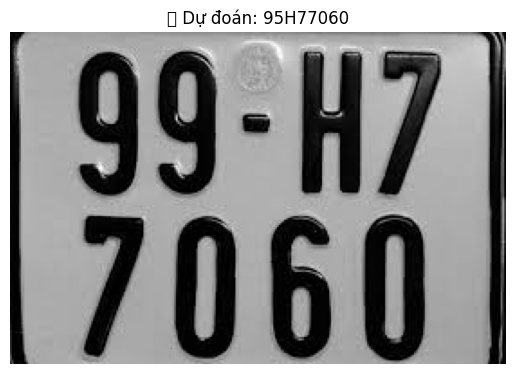

'95H77060'

In [ ]:
predict_image(model, 'bienso.jpg', charset)